Use below code to make `tf 2 to 1`

In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#importing data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 85s 7us/step


In [5]:
#transforming data
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [6]:
training_images.shape,training_labels.shape

((60000, 28, 28, 1), (60000,))

Text(0.5, 1.0, 'Label : 7')

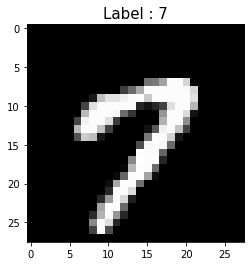

In [7]:
n=15 #image number
plt.imshow(training_images[n].reshape(28,-1),cmap="gray")
plt.title(f"Label : {training_labels[n]}",fontdict={'fontsize':15,'fontweight':2})

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10,validation_data=(test_images, test_labels))#,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss'))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 53s 876us/sample - loss: 0.1540 - acc: 0.9549 - val_loss: 0.0622 - val_acc: 0.9800
Epoch 2/10
60000/60000 [==============================] - 50s 825us/sample - loss: 0.0510 - acc: 0.9844 - val_loss: 0.0513 - val_acc: 0.9827
Epoch 3/10
60000/60000 [==============================] - 50s 837us/sample - loss: 0.0327 - acc: 0.9901 - val_loss: 0.0422 - val_acc: 0.9857
Epoch 4/10
60000/60000 [==============================] - 50s 834us/sample - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0483 - val_acc: 0.9845
Epoch 5/10
43456/60000 [====================>.........] - ETA: 13s - loss: 0.0147 - acc: 0.9951

KeyboardInterrupt: 

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 2s 208us/sample - loss: 0.0419 - acc: 0.9867
0.9867


In [12]:
model.save("mnist_model.h5")

In [13]:
# tf.keras.models.load_model("mnist_model.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
test_images[0].shape

NameError: name 'test_images' is not defined

In [36]:
np.expand_dims(test_images[0],axis=0).shape

(1, 28, 28, 1)

In [40]:
model.predict(np.expand_dims(test_images[0],axis=0)).argmax()

7

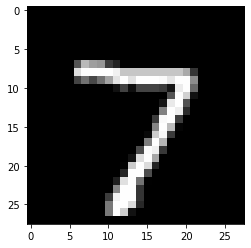

In [39]:
plt.imshow(test_images[0].reshape(28,-1),cmap="gray")

In [38]:
test_labels[0]

7